In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [108]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

X = df['pH']
y = df['fixed acidity']



In [109]:
class LinearRegression:
    
    def __init__(self, n_features):
        self.W = np.random.normal(-1,1,(n_features,1)) #weights
        self.b = np.random.rand(1) #intercept
        
    def descent(self, delta_W, delta_b, learning_rate):
        #updating the weights with the calculated gradients
        self.W -= learning_rate*delta_W                                                                  
        self.b -= learning_rate*delta_b 
        
    def derivatives(self, X, Y):
        #partial derivative of cost w.r.t the weights
        delta_W = np.sum(np.multiply(((np.matmul(X,self.W)+self.b)-Y), X))*2/X.shape[0] 
        #partial derivative of cost w.r.t the intercept
        delta_b = np.sum(((np.matmul(X,self.W)+self.b)-Y))*2/X.shape[0]                
        return delta_W, delta_b
    
    #fit
    def train(self, X, Y, epochs=50, learning_rate=0.1):
        X = np.array(X).reshape(-1,1)
        Y = np.array(Y).reshape(-1,1)

              
        for i in range(epochs):
            
            delta_W, delta_b = self.derivatives(X, Y)
            self.descent(delta_W, delta_b, learning_rate)
            
            
            
        return self.W, self.b

    def predict(self, X):
        print(X.shape, X.reshape(-1,1).shape)
        product = np.matmul(np.array(X).reshape(-1,1),self.W)+self.b
        return product
    
    

In [110]:
X = (X-X.mean())/X.std() #Feature Engeneering: Standarization 
y = (y-y.mean())/y.std()
X.shape, y.shape

((1599,), (1599,))

In [111]:
reg = LinearRegression(n_features=1)

[-0.68297819] 2.0313988376218515e-14
(500,) (500, 1)


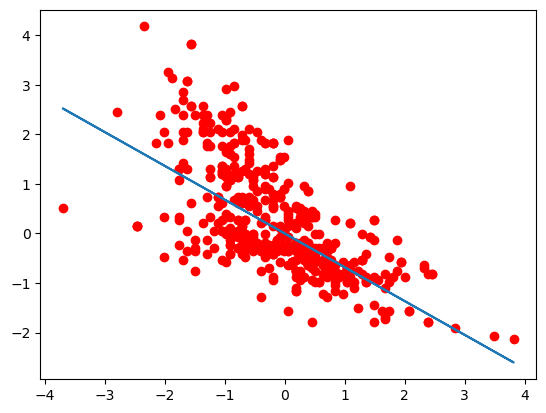

In [112]:
params = reg.train(X, y, epochs=50, learning_rate=0.225)
print(params[0][-1], params[1][-1])
plt.scatter(X[:500], y[:500], color='red')
pred = reg.predict(np.array(X[:500]))
plt.plot(X[:500], pred[:500])